In [405]:
import pandas as pd 
import numpy as np
import json
import pprint
from scipy import stats
from collections import  Counter
from scipy.stats import entropy
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [406]:
data = pd.read_csv('Data/USvideos.csv')
samples = data.sample(n=50)
samples

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
704,R9c-_neaxeU,17.17.11,MENACE: the pile of matchboxes which can learn,standupmaths,24,2017-11-14T16:29:00.000Z,"maths|""math""|""mathematics""|""comedy""|""stand-up""...",113820,5562,50,593,https://i.ytimg.com/vi/R9c-_neaxeU/default.jpg,False,False,False,See more data and check out what we changed on...
563,8mhTWqWlQzU,17.16.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week|...,3031863,121285,1186,6852,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...
5564,0ZAA9Y4F37I,17.11.12,Veteran Congressman John Conyers Announces He ...,The View,25,2017-12-05T16:12:12.000Z,"John Conyers|""congress""|""the view""|""hot topics...",52395,288,477,319,https://i.ytimg.com/vi/0ZAA9Y4F37I/default.jpg,False,False,False,NaN
37075,6fyE0B430Rc,18.26.05,Chocolate & Banana Half Birthday Cake | How To...,How To Cake It,26,2018-05-15T14:59:46.000Z,"Google|""YouTube""|""Yolanda Gampp""|""Yolanda Gamp...",532970,18187,284,1515,https://i.ytimg.com/vi/6fyE0B430Rc/default.jpg,False,False,False,SUBSCRIBE For New Vids Tues @ 11am EST http://...
33393,iJz5jURaEBc,18.08.05,MY GLOWING Natural MAKEUP ROUTINE,Tati,26,2018-05-04T17:00:07.000Z,"YouTube|""Beauty""|""Makeup""|""Tutorial""|""Review""|...",559333,30921,1429,2804,https://i.ytimg.com/vi/iJz5jURaEBc/default.jpg,False,False,False,Today I'm showing you my effortless glow dewy ...
3979,sOIBkZsGb0A,17.03.12,Should You Confess Feelings To A Friend? / Gab...,Just Between Us,23,2017-11-27T16:00:06.000Z,"women in comedy|""comedy""|""funny""|""humor""|""funn...",168118,5670,399,614,https://i.ytimg.com/vi/sOIBkZsGb0A/default.jpg,False,False,False,Get in a car. Take a drive in the snow.\n\nSho...
4694,sxxJug2Ob_A,17.07.12,Latino Hunger Games | Lele Pons,Lele Pons,23,2017-12-02T18:30:25.000Z,"latino hunger games|""lele""|""pons""|""latino""|""hu...",3754401,167512,11882,10764,https://i.ytimg.com/vi/sxxJug2Ob_A/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ https://youtu.be/dpL...
7386,cZxOvNxbi7U,17.20.12,Annie Leibovitz Teaches Photography | Official...,MasterClass,27,2017-12-14T14:40:13.000Z,"annie leibovitz|""masterclass""|""photgraphy""|""po...",2563098,1570,16,73,https://i.ytimg.com/vi/cZxOvNxbi7U/default.jpg,False,False,False,Learn more about Annie Leibovitz Teaches Photo...
11909,1UpvW5LiE2k,18.14.01,Meme Team - Top 5,NBA,17,2018-01-12T00:01:03.000Z,"nba|""basketball""|""starters""",119128,2454,45,65,https://i.ytimg.com/vi/1UpvW5LiE2k/default.jpg,False,False,False,It's The Starters' weekly hunt for memes - the...
2809,2mrOcJNPxEc,17.28.11,Prince Harry And Meghan Markle Are Engaged And...,TODAY,25,2017-11-27T13:50:01.000Z,"The TODAY Show|""TODAY Show""|""TODAY""|""NBC""|""NBC...",117714,858,229,534,https://i.ytimg.com/vi/2mrOcJNPxEc/default.jpg,False,False,False,"The announcement from Clarence House, official..."


In [407]:
new_df = pd.DataFrame(samples,columns = ['views', 'comment_count','category_id','trending_date','tags'])

def cleanString(incomingString):
    newstring = incomingString
    newstring = newstring.replace("\"","")
    newstring = list(filter(None,newstring.split('|')))
    return newstring

tagsList = []
tagsList = [ cleanString(col['tags']) for idx,col in new_df.iterrows()] 
new_df['tags'] = tagsList

# new_df['views'], new_df['comment_count']  = pd.cut(new_df['views'],3, labels=["Low","Medium","High"]),pd.cut(new_df['comment_count'],3, labels=["Low","Medium","High"])
# new_df



In [408]:
def normalize(col):
    min = np.min(col)
    max = np.max(col)
    range = max - min

    return [(item - min) / range for item in col]
new_df['views'], new_df['comment_count'] = normalize(new_df['views']), normalize(new_df['comment_count'])
new_df


,views,comment_count,category_id,trending_date,tags
704,0.009015,0.015075,24,17.17.11,"[maths, math, mathematics, comedy, stand-up, m..."
563,0.249262,0.174732,22,17.16.11,[wearing online dollar store makeup for a week...
5564,0.003958,0.008086,25,17.11.12,"[John Conyers, congress, the view, hot topics,..."
37075,0.043524,0.038594,26,18.26.05,"[Google, YouTube, Yolanda Gampp, Yolanda Gamp,..."
33393,0.045695,0.071474,26,18.08.05,"[YouTube, Beauty, Makeup, Tutorial, Review, vl..."
3979,0.013486,0.015611,23,17.03.12,"[women in comedy, comedy, funny, humor, funny ..."
4694,0.308750,0.274520,23,17.07.12,"[latino hunger games, lele, pons, latino, hung..."
7386,0.210668,0.001811,27,17.20.12,"[annie leibovitz, masterclass, photgraphy, por..."
11909,0.009452,0.001607,17,18.14.01,"[nba, basketball, starters]"
2809,0.009336,0.013570,25,17.28.11,"[The TODAY Show, TODAY Show, TODAY, NBC, NBC N..."


In [409]:
def ent(labels, base=None):
  value,counts = np.unique(labels, return_counts=True)
  return entropy(counts, base=base)
cat_count = 32
for col in new_df:
    e = ent(new_df[col],len(new_df[col]))
    print(col+" entropy = ",e)

views entropy =  0.9999999999999999
comment_count entropy =  0.9929126471945775
category_id entropy =  0.5956918674539365
trending_date entropy =  0.9291264719457767
tags entropy =  0.9999999999999999


In [410]:
df = pd.DataFrame(new_df, columns = ['views','comment_count'])
kmeans = KMeans(n_clusters=3).fit(df)
centroids = pd.DataFrame(kmeans.cluster_centers_)

Text(0, 0.5, 'comments')

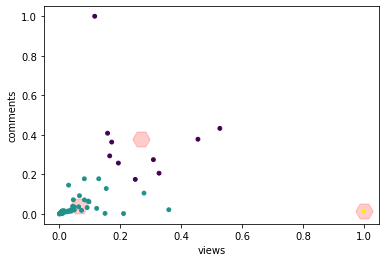

In [411]:
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],c = 'red' ,s = 300,marker='H',edgecolors = 'face',alpha = .2)
plt.scatter(df.iloc[:,0], df.iloc[:,1],s=15,c = kmeans.labels_.astype(np.float)*5)
plt.xlabel("views")
plt.ylabel("comments")

In [412]:
df = pd.DataFrame(new_df, columns = ['views','comment_count','category_id'])
kmeans = KMeans(n_clusters=3).fit(df)
labels = kmeans.labels_


In [413]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
print(centroids)

0         1       2
0  0.117070  0.107765  24.375
1  0.231811  0.164177   1.000
2  0.101142  0.059115  13.500


In [414]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 0, 0])

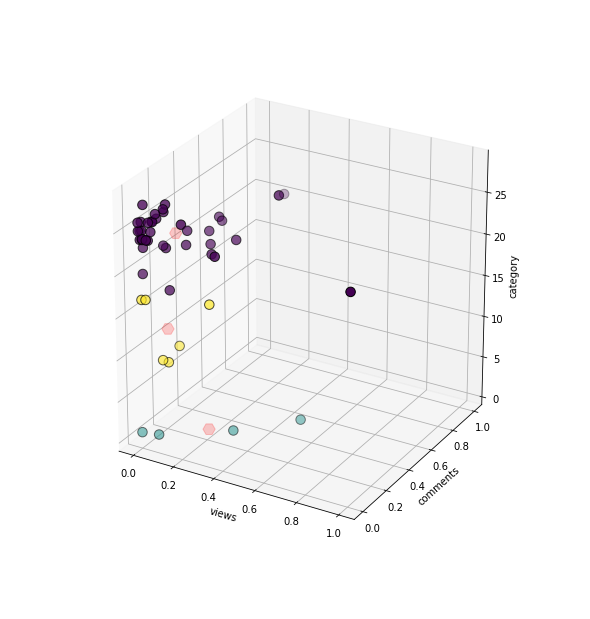

In [415]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(1, 3))
ax = Axes3D(fig, rect=[0, 0, 8, 2.8],elev=25)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2],s = 90, c = labels.astype(np.float)*5,edgecolor='k')
ax.scatter(centroids.iloc[:,0],centroids.iloc[:,1],centroids.iloc[:,2],c = 'red' ,s = 150,marker='H',edgecolors = 'face',alpha = .2)
ax.set_xlabel('views')
ax.set_ylabel('comments')
ax.set_zlabel('category')
ax.set_title("")
ax.dist = 12

In [417]:
import gower

- Gower + Kmedoids
- GOwer + Hierarchy
- Gower + DBScan
- Entropy
- corel coef
- chi squ